In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("E:\markov ml\Python day2\Python day2\churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
for i in df.columns:
    print(i)
    print(df[i].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [5]:
df['gender'].replace(['Female','Male'], [0,1], inplace = True)
df['SeniorCitizen'].replace( [0,1] , [0,1], inplace = True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,0,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,1,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,0,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,0,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,1,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
df['Partner'].replace(['Yes','No'],[1,0],inplace=True)
df['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
df['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
df['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
df['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
df['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
df['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
df['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
df['Churn'].replace(['Yes','No'],[1,0],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(18), object(2)
memory u

In [7]:
df['TotalCharges'].replace(" ", 0, inplace = True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(18), object(1)
memory 

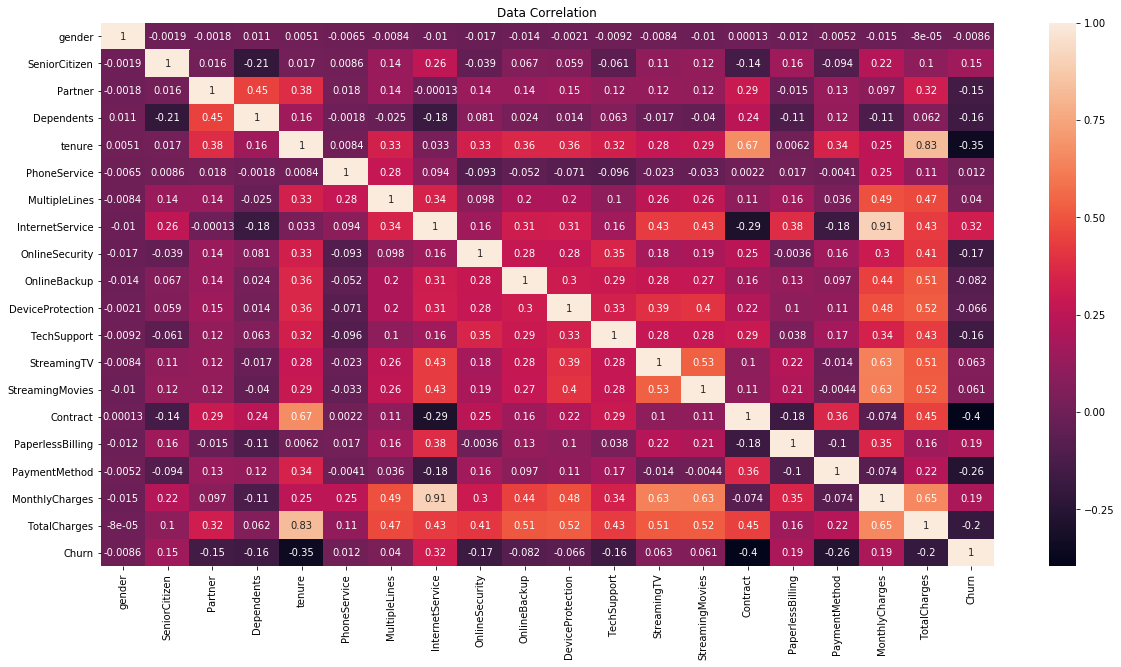

In [8]:
plt.subplots(figsize = (20,10))
plt.title("Data Correlation")
sns.heatmap(df.corr(), annot = True)

In [9]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.010380,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.000126,-0.011754,-0.005209,-0.014569,-0.000080,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,0.259390,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.093704,0.220173,0.103006,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,-0.000132,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,0.133115,0.096848,0.317504,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,-0.179631,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,0.123844,-0.113890,0.062078,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.033230,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,0.340305,0.247900,0.826178,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.093720,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,-0.004070,0.247398,0.113214,0.011942
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.344684,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.163530,0.035851,0.490434,0.468504,0.040102
InternetService,-0.010380,0.259390,-0.000132,-0.179631,0.033230,0.093720,0.344684,1.000000,0.156799,0.307420,0.313603,0.164833,0.429707,0.427264,-0.290189,0.378108,-0.178137,0.905491,0.428963,0.316846
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,0.156799,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,0.163367,0.296594,0.411651,-0.171226
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.307420,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,0.096550,0.441780,0.509226,-0.082255


In [10]:
df = df.drop([ 'customerID', 'TotalCharges' ], axis = 1)
#del df['customerID']
#df.pop(TotalCharges)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(1), int64(18)
memory usage: 1.0 MB


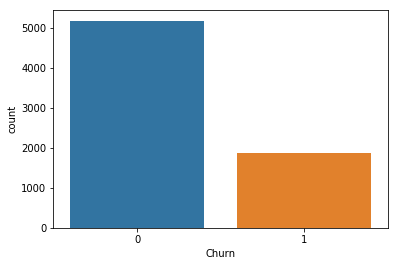

In [11]:
sns.countplot('Churn', data = df)

In [12]:
train, test = train_test_split(df, test_size = 0.3)

In [13]:
train_y = train['Churn']
test_y = test['Churn']

In [14]:
test_y

409     1
1264    0
545     0
4524    1
3703    0
5108    0
507     1
2059    0
3887    1
2744    0
5831    1
5161    0
623     0
4158    0
5671    0
3557    0
6481    0
2399    0
2040    0
6318    0
1251    1
5024    0
3282    0
6575    0
1462    0
2270    1
3060    0
986     0
2467    0
1944    1
       ..
126     1
3593    1
5452    0
344     0
2111    0
6649    0
3428    1
5114    0
5847    0
1719    0
2868    0
2632    0
1282    0
3426    1
5115    0
1301    0
1312    0
4591    0
2187    0
1377    0
3643    0
2874    0
4317    0
3472    0
5782    1
494     0
748     0
4787    0
5920    0
6746    1
Name: Churn, Length: 2113, dtype: int64

In [15]:
train_x = train
train_x.pop('Churn')
test_x = test
test_x.pop('Churn')

409     1
1264    0
545     0
4524    1
3703    0
5108    0
507     1
2059    0
3887    1
2744    0
5831    1
5161    0
623     0
4158    0
5671    0
3557    0
6481    0
2399    0
2040    0
6318    0
1251    1
5024    0
3282    0
6575    0
1462    0
2270    1
3060    0
986     0
2467    0
1944    1
       ..
126     1
3593    1
5452    0
344     0
2111    0
6649    0
3428    1
5114    0
5847    0
1719    0
2868    0
2632    0
1282    0
3426    1
5115    0
1301    0
1312    0
4591    0
2187    0
1377    0
3643    0
2874    0
4317    0
3472    0
5782    1
494     0
748     0
4787    0
5920    0
6746    1
Name: Churn, Length: 2113, dtype: int64

In [16]:
train_x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
2716,0,0,1,0,19,1,0,1,0,0,0,0,0,0,0,0,1,44.90
3830,1,0,1,0,4,1,1,2,0,1,0,0,1,1,0,1,0,100.20
1053,0,0,0,0,5,0,0,1,0,0,1,0,0,1,0,0,0,39.50
4776,0,0,1,0,5,1,0,2,0,0,0,0,0,0,0,1,0,68.95
4079,0,0,1,0,10,1,1,2,1,0,0,0,0,0,0,1,3,78.15
2081,0,0,1,1,23,1,0,2,0,0,1,0,0,0,0,1,3,75.30
4489,0,0,1,1,64,1,1,1,0,1,0,0,0,0,1,1,2,53.85
884,0,0,1,1,49,0,0,1,1,0,0,1,0,0,1,1,3,35.80
850,0,0,1,1,72,1,1,2,1,1,1,1,1,1,2,1,2,115.80
4436,0,0,0,1,19,1,0,1,1,1,1,0,0,0,0,1,0,60.60


In [18]:
lr = LogisticRegression()
lr.fit(train_x, train_y)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
y_train_pred = lr.predict(test_x)

Recall metric in the testing dataset:  0.5401869158878505
precision metric in the testing dataset:  0.8130619971604354


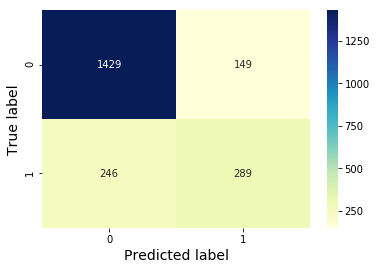

In [26]:
cnfmtrx = confusion_matrix(test_y, y_train_pred)

sns.heatmap(cnfmtrx, annot=True, fmt="d", cmap = 'YlGnBu')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

print("Recall metric in the testing dataset: ", cnfmtrx[1,1]/(cnfmtrx[1,0]+cnfmtrx[1,1]))
print("precision metric in the testing dataset: ", (cnfmtrx[1,1]+cnfmtrx[0,0])/(cnfmtrx[1,0]+cnfmtrx[1,1]+cnfmtrx[0,0]+cnfmtrx[0,1]))

In [24]:
cnfmtrx

array([[1429,  149],
       [ 246,  289]], dtype=int64)